## Import

In [4]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

## 초등 학생별 수준 군집화

In [48]:
middle1_score_df = pd.read_csv('./datasets/score.csv',index_col=0)

In [49]:
middle1_score_df[['국어','영어','수학','과학','사회','역사']].dropna()

,국어,영어,수학,과학,사회,역사
3,68.0,86.0,57.0,15.0,53.0,45.0
10,79.0,93.0,46.0,30.0,45.0,15.0
13,93.0,100.0,48.0,56.0,63.0,100.0
23,100.0,100.0,88.0,61.0,90.0,33.0
32,93.0,100.0,65.0,53.0,45.0,90.0
...,...,...,...,...,...,...
1888,86.0,68.0,94.0,90.0,100.0,79.0
2014,65.0,58.0,63.0,0.0,0.0,0.0
2349,54.0,79.0,51.0,90.0,90.0,71.0
3165,47.0,93.0,55.0,30.0,100.0,71.0


In [50]:
input_data = middle1_score_df[['국어','영어','수학','과학','사회','역사']].dropna()

In [51]:
gmm = GaussianMixture(n_components=3, random_state = 42)
gmm_labels = gmm.fit_predict(input_data)

input_data['gmm_cluster'] = gmm_labels

In [52]:
input_data

,국어,영어,수학,과학,사회,역사,gmm_cluster
3,68.0,86.0,57.0,15.0,53.0,45.0,0
10,79.0,93.0,46.0,30.0,45.0,15.0,0
13,93.0,100.0,48.0,56.0,63.0,100.0,0
23,100.0,100.0,88.0,61.0,90.0,33.0,1
32,93.0,100.0,65.0,53.0,45.0,90.0,0
...,...,...,...,...,...,...,...
1888,86.0,68.0,94.0,90.0,100.0,79.0,1
2014,65.0,58.0,63.0,0.0,0.0,0.0,2
2349,54.0,79.0,51.0,90.0,90.0,71.0,0
3165,47.0,93.0,55.0,30.0,100.0,71.0,0


In [53]:
input_data.groupby(['gmm_cluster']).size()

gmm_cluster
0    164
1    123
2     64
dtype: int64

- PCA

In [54]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

pca.fit(input_data)
score_pca = pca.transform(input_data)
print(score_pca.shape)

(351, 2)


In [55]:
pca_columns=['pca_component_1','pca_component_2']
scoreDF_pca = pd.DataFrame(score_pca, columns=pca_columns)
scoreDF_pca.head(3)

,pca_component_1,pca_component_2
0,37.770495,17.454206
1,51.751081,0.929811
2,-21.041320,48.268084


In [56]:
gmm = GaussianMixture(n_components=3, random_state = 42)
gmm_labels = gmm.fit_predict(scoreDF_pca)

scoreDF_pca['gmm_cluster'] = gmm_labels

In [57]:
scoreDF_pca

,pca_component_1,pca_component_2,gmm_cluster
0,37.770495,17.454206,0
1,51.751081,0.929811,0
2,-21.041320,48.268084,0
3,-16.260782,-23.577664,0
4,-12.511490,50.824162,0
...,...,...,...
346,-52.733282,-5.047060,1
347,99.211709,18.381998,2
348,-23.247149,-0.325728,1
349,-2.800531,2.950930,0


In [59]:
result = input_data.reset_index()
result

,index,국어,영어,수학,과학,사회,역사,gmm_cluster
0,3,68.0,86.0,57.0,15.0,53.0,45.0,0
1,10,79.0,93.0,46.0,30.0,45.0,15.0,0
2,13,93.0,100.0,48.0,56.0,63.0,100.0,0
3,23,100.0,100.0,88.0,61.0,90.0,33.0,1
4,32,93.0,100.0,65.0,53.0,45.0,90.0,0
...,...,...,...,...,...,...,...,...
346,1888,86.0,68.0,94.0,90.0,100.0,79.0,1
347,2014,65.0,58.0,63.0,0.0,0.0,0.0,2
348,2349,54.0,79.0,51.0,90.0,90.0,71.0,0
349,3165,47.0,93.0,55.0,30.0,100.0,71.0,0


In [60]:
result['gmm_cluster'] = scoreDF_pca['gmm_cluster']
result

,index,국어,영어,수학,과학,사회,역사,gmm_cluster
0,3,68.0,86.0,57.0,15.0,53.0,45.0,0
1,10,79.0,93.0,46.0,30.0,45.0,15.0,0
2,13,93.0,100.0,48.0,56.0,63.0,100.0,0
3,23,100.0,100.0,88.0,61.0,90.0,33.0,0
4,32,93.0,100.0,65.0,53.0,45.0,90.0,0
...,...,...,...,...,...,...,...,...
346,1888,86.0,68.0,94.0,90.0,100.0,79.0,1
347,2014,65.0,58.0,63.0,0.0,0.0,0.0,2
348,2349,54.0,79.0,51.0,90.0,90.0,71.0,1
349,3165,47.0,93.0,55.0,30.0,100.0,71.0,0


In [63]:
result.groupby(['gmm_cluster']).size()

gmm_cluster
0    196
1    122
2     33
dtype: int64

### 결과 과목별 시각화

In [34]:
def ploting_score(df):
    f, ax = plt.subplots(2,3)
    f.set_size_inches((25,10))

    plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

    ############ 1 ###############

    sns.histplot(df[df['gmm_cluster'] == 0]['국어'].tolist(),
                color="tomato", ax = ax[0,0], kde = True)
    sns.histplot(df[df['gmm_cluster'] == 1]['국어'].tolist(),
                color="mediumorchid", ax = ax[0,0], kde = True)
    sns.histplot(df[df['gmm_cluster'] == 2]['국어'].tolist(),
                color="gold", ax = ax[0,0], kde = True)
    ax[0,0].set_title('Korean')
    ax[0,0].set_xlim([-10,110])

    ############ 2 ###############

    sns.histplot(df[df['gmm_cluster'] == 0]['수학'].tolist(),
                color="tomato", ax = ax[0,1], kde = True)
    sns.histplot(df[df['gmm_cluster'] == 1]['수학'].tolist(),
                color="mediumorchid", ax = ax[0,1], kde = True)
    sns.histplot(df[df['gmm_cluster'] == 2]['수학'].tolist(),
                color="gold", ax = ax[0,1], kde = True)
    ax[0,1].set_title('Math')
    ax[0,1].set_xlim([-10,110])


    ############ 3 ###############
    sns.histplot(df[df['gmm_cluster'] == 0]['영어'].tolist(),
                color="tomato",ax = ax[0,2], kde = True)
    sns.histplot(df[df['gmm_cluster'] == 1]['영어'].tolist(),
                color="mediumorchid", ax = ax[0,2], kde = True)
    sns.histplot(df[df['gmm_cluster'] == 2]['영어'].tolist(),
                color="gold", ax = ax[0,2], kde = True)
    ax[0,2].set_title('English')
    ax[0,2].set_xlim([-10,110])

    ############ 4 ###############
    sns.histplot(df[df['gmm_cluster'] == 0]['사회'].tolist(),
                color="tomato", ax = ax[1,0], kde = True)
    sns.histplot(df[df['gmm_cluster'] == 1]['사회'].tolist(),
                color="mediumorchid", ax = ax[1,0], kde = True)
    sns.histplot(df[df['gmm_cluster'] == 2]['사회'].tolist(),
                color="gold", ax = ax[1,0], kde = True)
    ax[1,0].set_title('Social')
    ax[1,0].set_xlim([-10,110])

    ############ 5 ###############
    sns.histplot(df[df['gmm_cluster'] == 0]['과학'].tolist(),
                color="tomato", ax = ax[1,1], kde = True)
    sns.histplot(df[df['gmm_cluster'] == 1]['과학'].tolist(),
                color="mediumorchid", ax = ax[1,1], kde = True)
    sns.histplot(df[df['gmm_cluster'] == 2]['과학'].tolist(),
                color="gold", ax = ax[1,1], kde = True)
    ax[1,1].set_title('Science')
    ax[1,1].set_xlim([-10,110])

    ############ 6 ###############
    sns.histplot(df[df['gmm_cluster'] == 0]['역사'].tolist(),
                color="tomato", ax = ax[1,2], kde = True)
    sns.histplot(df[df['gmm_cluster'] == 1]['역사'].tolist(),
                color="mediumorchid", ax = ax[1,2], kde = True)
    sns.histplot(df[df['gmm_cluster'] == 2]['역사'].tolist(),
                color="gold", ax = ax[1,2], kde = True)
    ax[1,2].set_title('History')
    ax[1,2].set_xlim([-10,110])

    plt.xlim(0,100)
    plt.show()

### 과제

#### 1. PCA 진행하지 않고, GMM 적용해보기(결과만 시각화)

- PCA 미적용

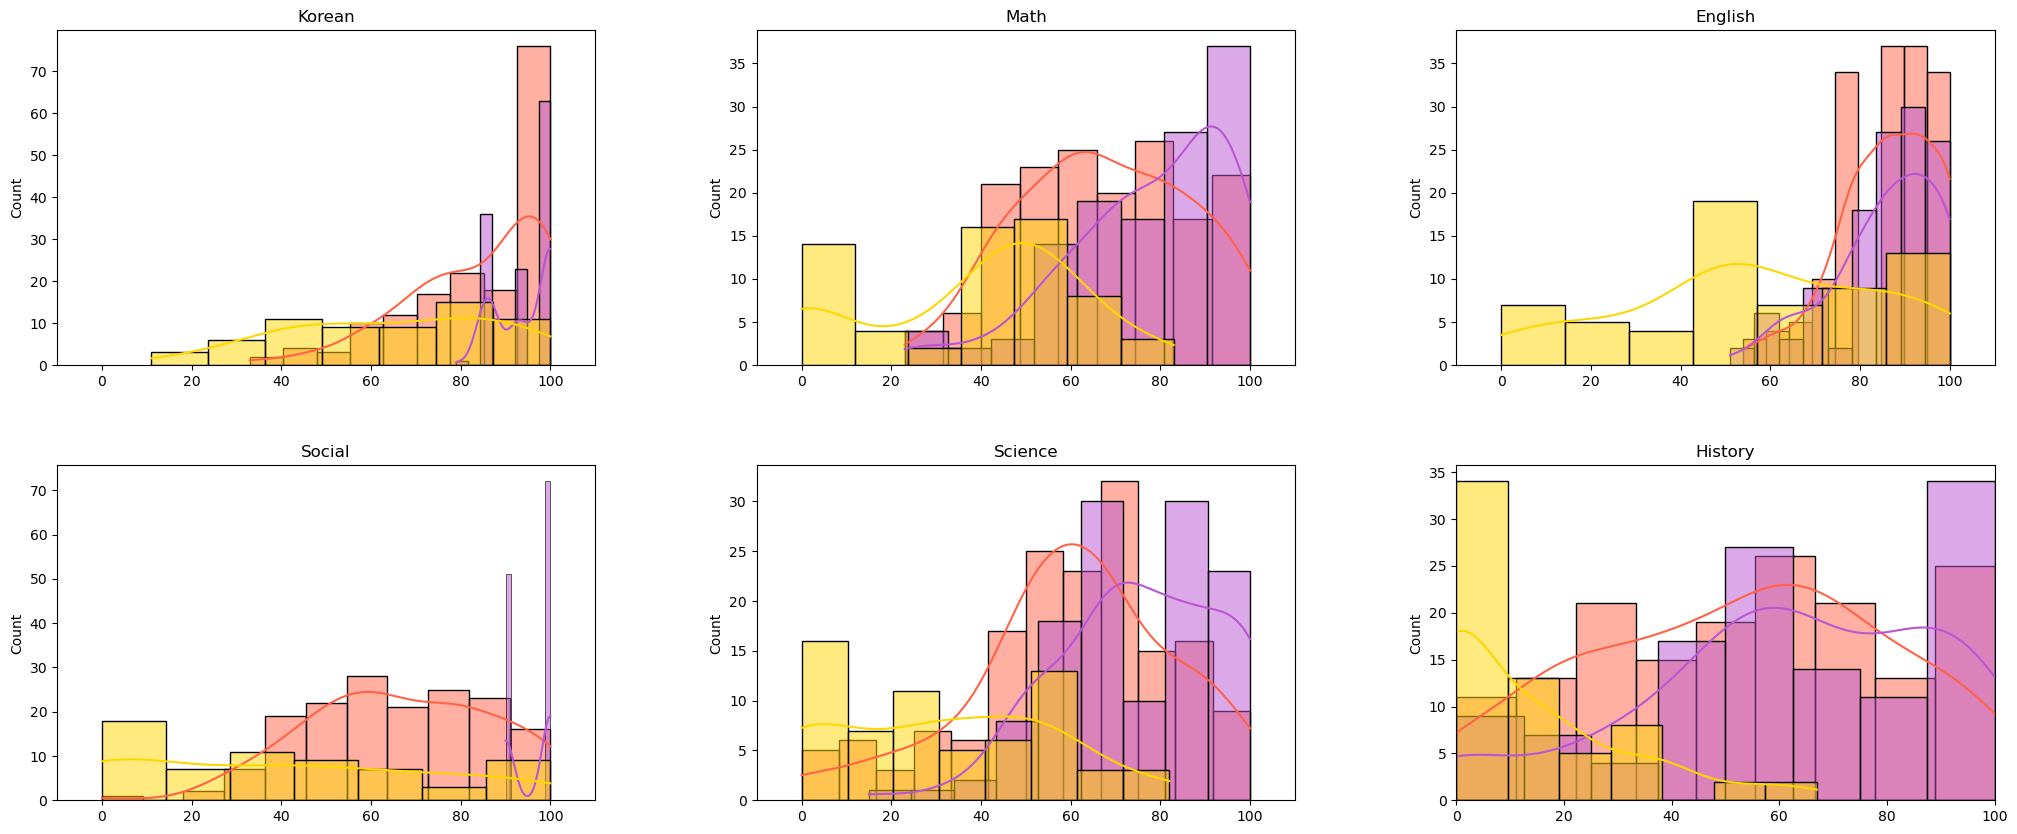

In [61]:
ploting_score(input_data)

- PCA 적용

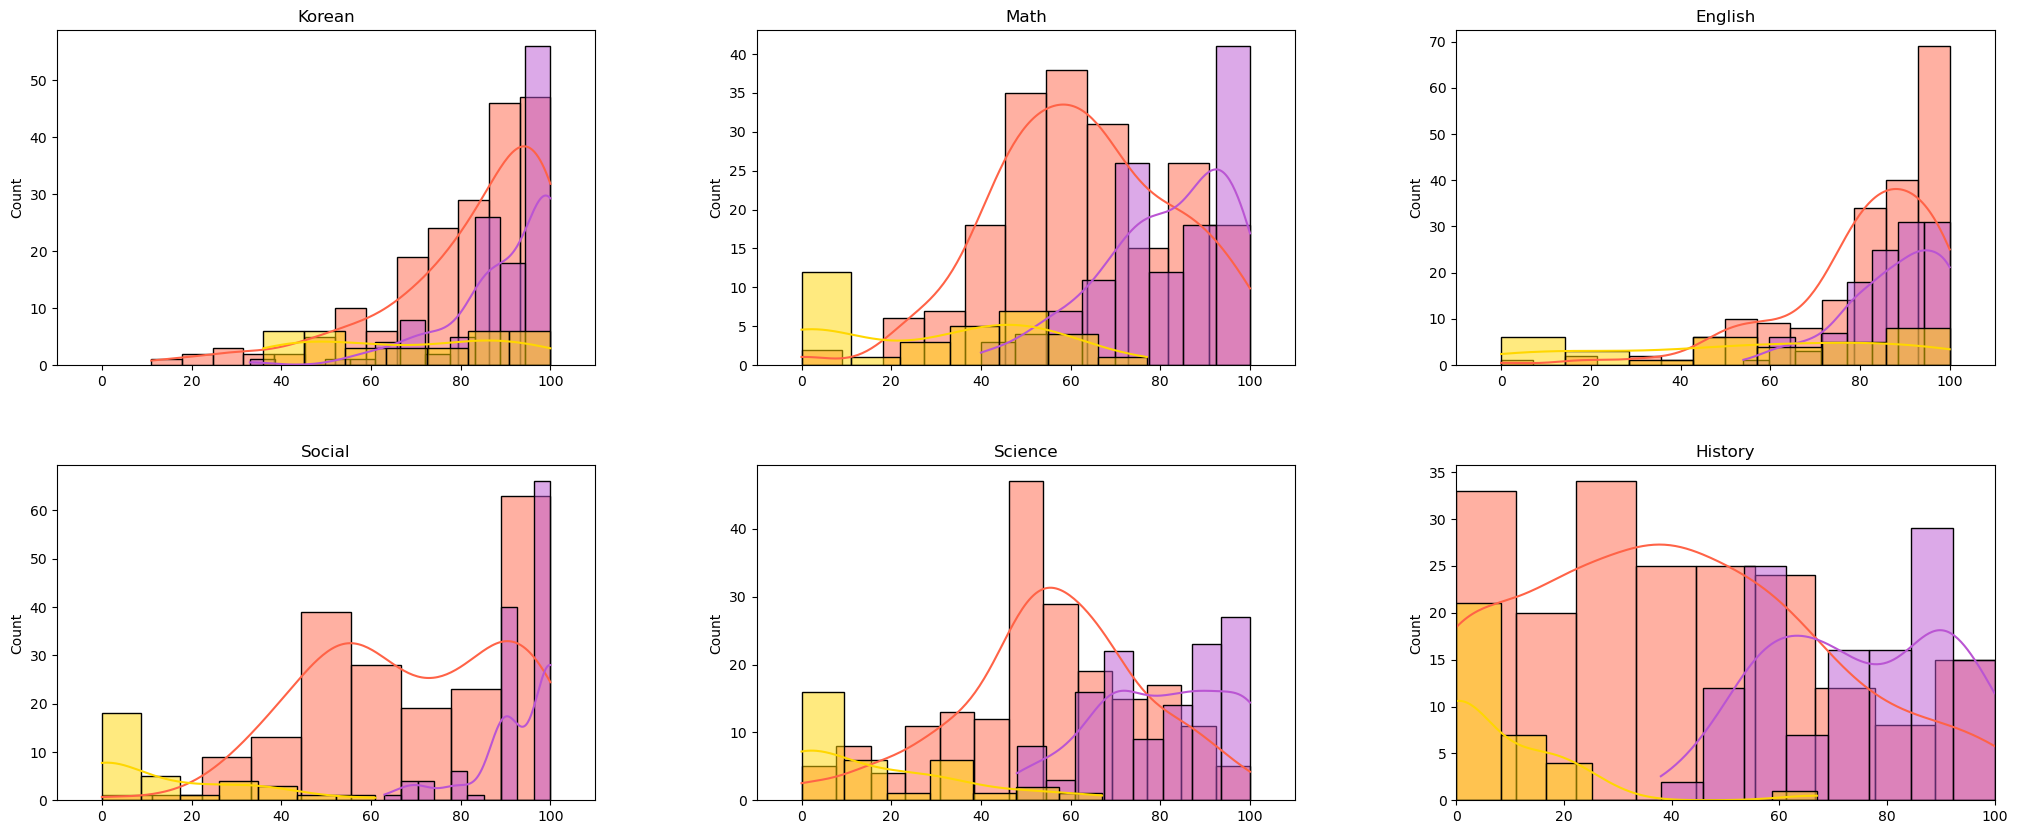

In [62]:
ploting_score(result)

#### 2. 국어와 수학과목의 성적이 유사한 사용자끼리 묶이도록 K-means 활용하여 5개의 군집 만들기

In [74]:
## X : 국어 , Y : 수학

ko_math = middle1_score_df[['국어','수학']].dropna()

In [75]:
X = ko_math.copy()

In [76]:
X = X.to_numpy().reshape(-1, 2)

In [77]:
X

array([[22., 41.],
       [47.,  0.],
       [68.,  0.],
       ...,
       [79., 23.],
       [58., 32.],
       [72., 88.]])

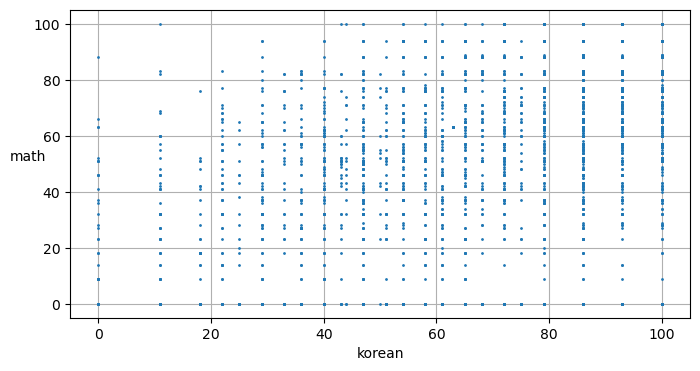

In [78]:
# extra code – this cell generates and saves Figure 9–2

def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("korean")
    plt.ylabel("math", rotation=0)

plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.gca().set_axisbelow(True)
plt.grid()
# save_fig("blobs_plot")
plt.show()

- K-Means

In [89]:
k = 4
kmeans = KMeans(n_clusters = k, random_state = 42)

y_pred = kmeans.fit_predict(X)

In [90]:
ko_math['kmeans_cluster'] = y_pred

- GMM

In [91]:
gmm = GaussianMixture(n_components=5, random_state = 42)
gmm_labels = gmm.fit_predict(ko_math)

ko_math['gmm_cluster'] = gmm_labels

- 확인

In [92]:
ko_math

,국어,수학,kmeans_cluster,gmm_cluster
0,22.0,41.0,2,0
1,47.0,0.0,2,4
2,68.0,0.0,0,2
3,68.0,57.0,1,1
4,93.0,57.0,3,3
...,...,...,...,...
3524,47.0,41.0,1,1
3525,61.0,0.0,0,2
3526,79.0,23.0,0,2
3527,58.0,32.0,0,2


- kmeans

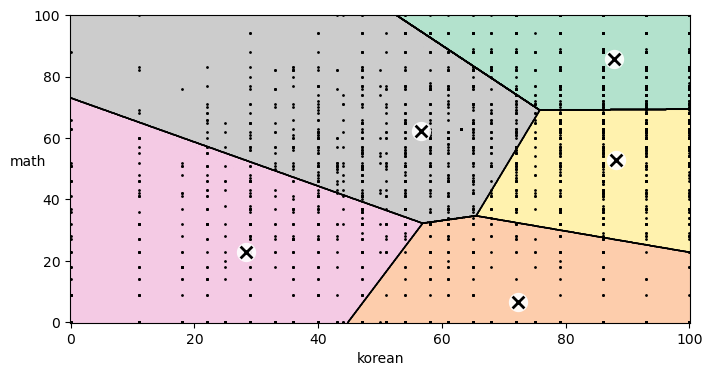

In [88]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    # 바탕 그리기
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")

    # 결정 경계 그리기
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')

    # 훈련 데이터셋과 센트로이드 그리기
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("korean")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("math", rotation=0)
    else:
        plt.tick_params(labelleft=False)

plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)

plt.show()

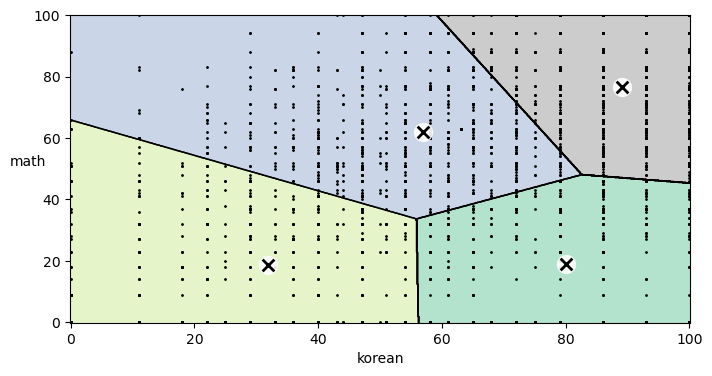

In [93]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)

plt.show()

- gmm

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


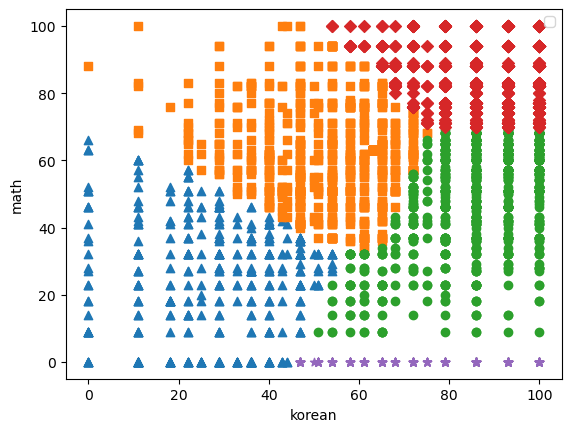

In [143]:
markers=['^', 's', 'o', 'D', '*']

for i, marker in enumerate(markers):
    x_axis_data = ko_math[ko_math['gmm_cluster']==i]['국어']
    y_axis_data = ko_math[ko_math['gmm_cluster']==i]['수학']
    plt.scatter(x_axis_data, y_axis_data, marker=marker)

plt.legend()
plt.xlabel('korean')
plt.ylabel('math')
plt.show()

- kmeans

In [118]:
def ploting_score_km(df):
    f, ax = plt.subplots(1,2)
    f.set_size_inches((15, 5))

    plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

    ############ 1 ###############

    sns.histplot(df[df['kmeans_cluster'] == 0]['국어'].tolist(),
                color="tomato", ax = ax[0])
    sns.histplot(df[df['kmeans_cluster'] == 1]['국어'].tolist(),
                color="mediumorchid", ax = ax[0])
    sns.histplot(df[df['kmeans_cluster'] == 2]['국어'].tolist(),
                color="gold", ax = ax[0])
    sns.histplot(df[df['kmeans_cluster'] == 3]['국어'].tolist(),
                color="green", ax = ax[0])
    sns.histplot(df[df['kmeans_cluster'] == 4]['국어'].tolist(),
                color="blue", ax = ax[0])
    ax[0].set_title('Korean')
    ax[0].set_xlim([0, 100])

    ############ 2 ###############

    sns.histplot(df[df['kmeans_cluster'] == 0]['수학'].tolist(),
                color="tomato", ax = ax[1])
    sns.histplot(df[df['kmeans_cluster'] == 1]['수학'].tolist(),
                color="mediumorchid", ax = ax[1])
    sns.histplot(df[df['kmeans_cluster'] == 2]['수학'].tolist(),
                color="gold", ax = ax[1])
    sns.histplot(df[df['kmeans_cluster'] == 3]['수학'].tolist(),
                color="green", ax = ax[1])
    sns.histplot(df[df['kmeans_cluster'] == 4]['수학'].tolist(),
                color="blue", ax = ax[1])
    ax[1].set_title('Math')
    ax[1].set_xlim([-10,110])

    plt.xlim(0,100)
    plt.show()

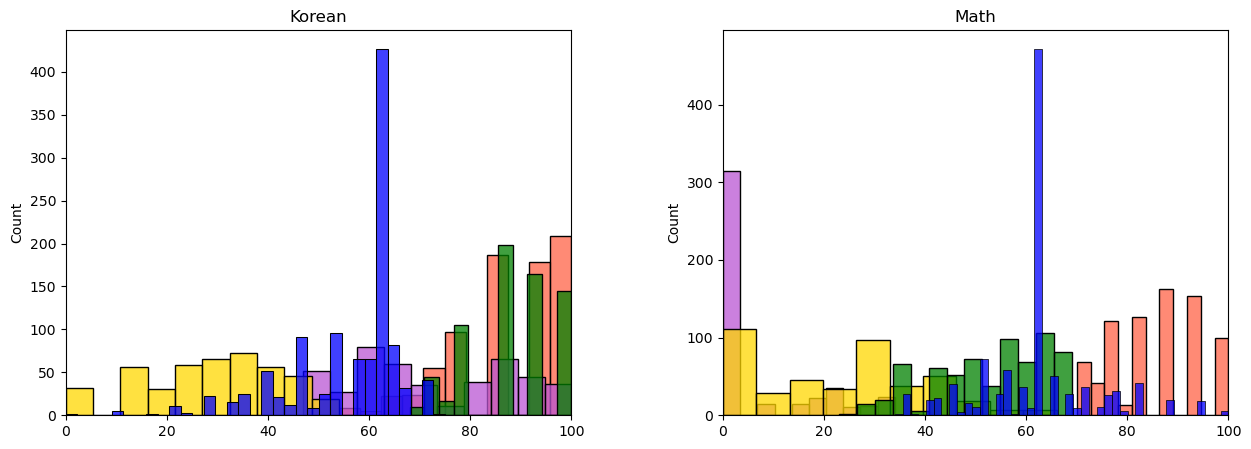

In [119]:
ploting_score_km(ko_math)

- gmm

In [122]:
def ploting_score_gmm(df):
    f, ax = plt.subplots(1,2)
    f.set_size_inches((15, 5))

    plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

    ############ 1 ###############

    sns.histplot(df[df['gmm_cluster'] == 0]['국어'].tolist(),
                color="tomato", ax = ax[0])
    sns.histplot(df[df['gmm_cluster'] == 1]['국어'].tolist(),
                color="mediumorchid", ax = ax[0])
    sns.histplot(df[df['gmm_cluster'] == 2]['국어'].tolist(),
                color="gold", ax = ax[0])
    sns.histplot(df[df['gmm_cluster'] == 3]['국어'].tolist(),
                color="green", ax = ax[0])
    sns.histplot(df[df['gmm_cluster'] == 4]['국어'].tolist(),
                color="blue", ax = ax[0])
    ax[0].set_title('Korean')
    ax[0].set_xlim([0, 100])

    ############ 2 ###############

    sns.histplot(df[df['gmm_cluster'] == 0]['수학'].tolist(),
                color="tomato", ax = ax[1])
    sns.histplot(df[df['gmm_cluster'] == 1]['수학'].tolist(),
                color="mediumorchid", ax = ax[1])
    sns.histplot(df[df['gmm_cluster'] == 2]['수학'].tolist(),
                color="gold", ax = ax[1])
    sns.histplot(df[df['gmm_cluster'] == 3]['수학'].tolist(),
                color="green", ax = ax[1])
    sns.histplot(df[df['gmm_cluster'] == 4]['수학'].tolist(),
                color="blue", ax = ax[1])
    ax[1].set_title('Math')
    ax[1].set_xlim([-10,110])

    plt.xlim(0,100)
    plt.show()

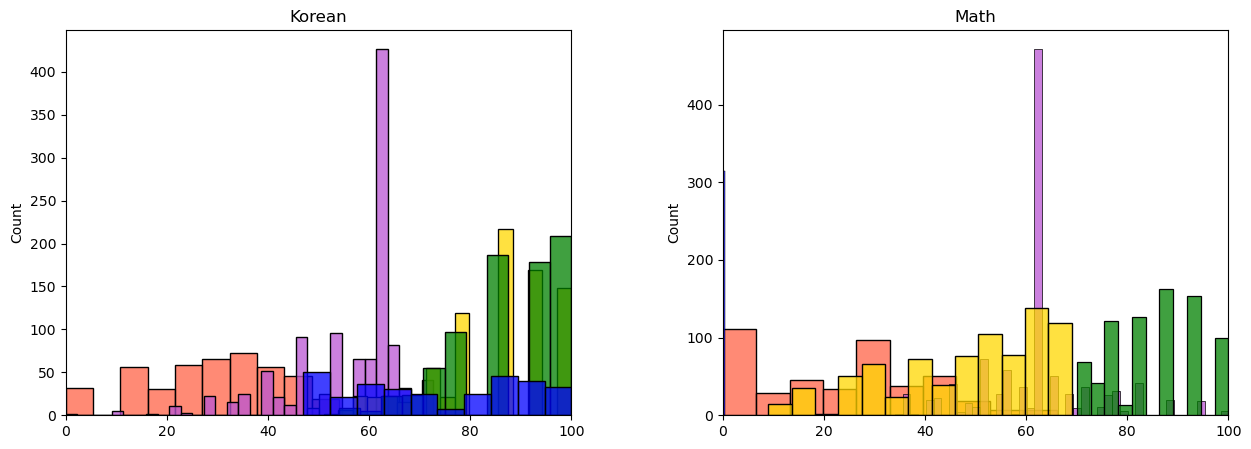

In [123]:
ploting_score_gmm(ko_math)

#### 느낀점

1. 과제 1번 시각화 자료의 kde plot을 보면 PCA를 실행한 경우 좀 더 정규분포의 형태를 띄는 것으로 보인다. 다만 수치가 아닌 시각화 자료만으로는 정확하게 알 수는 없다. 반면 군집 간의 데이터 수는 PCA를 적용하지 않은 쪽이 조금 더 고르게 나뉘었는데 PCA에 의한 것인지 데이터 형태에 의한 것인지는 여러가지 경우를 실험해봐야 알 수 있을 것 같다.
2. 2번 과제의 데이터는 국어와 수학의 2개 축으로 되어있기 때문에 굳이 군집을 나눈다면 국어와 수학 점수의 높고 낮음에 따라 4개의 군집으로 나누는 것이 의미가 있는 군집화일 것이다. 이 상황에서 5개의 군집으로 나누라고 했을 때 K-means는 어느정도 비율을 맞춰가며 5개의 군집을 만든 반면, gmm은 하나의 군집을 버리다시피 하고 의미있는 4개의 군집을 형성했다. 다만 이 경우에도 데이터 형태와 우연이 겹친 것인지는 몇 가지 경우를 시험해봐야 알 수 있을 것이다.